# Criteria to select genes and cells

- eliminate proliferating cell types (not interested in proliferating cell states)
- remake the gene lists based on the DE new criteria (wilcox, pval threshold, sorted by logfc)

In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse
import anndata
import seaborn as sns
#import scvelo as scv

#import milopy.core as milo
#import milopy.plot as milopl


In [2]:
sc.set_figure_params(dpi=80, dpi_save=600) # Makes it more visible

In [3]:
tmpfile = '../h5ad_files/Tcells_lineage_wilcox_tmp.h5ad'

In [4]:
adata = sc.read_h5ad('../h5ad_files/Tcells.h5ad')
adata

AnnData object with n_obs × n_vars = 216611 × 36503
    obs: 'donor_id', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_type_ontology_term_id_colors', 'default_embedding', 'development_stage_ontology_term_id_colors', 'schema_version', 'sex_ontology_term_id_colors', 'title'
    obsm: 'X_umap'

In [5]:
adata.raw

In [6]:
adata = adata.raw.to_adata()

In [7]:
adata.X.max()

5168.0

In [8]:
adata

AnnData object with n_obs × n_vars = 216611 × 36503
    obs: 'donor_id', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_type_ontology_term_id_colors', 'default_embedding', 'development_stage_ontology_term_id_colors', 'schema_version', 'sex_ontology_term_id_colors', 'title'
    obsm: 'X_umap'

In [9]:
adata.obs["Manually_curated_celltype"].cat.categories

Index(['Cycling T&NK', 'ILC3', 'MAIT', 'NK_CD16+', 'NK_CD56bright_CD16-',
       'T_CD4/CD8', 'Teffector/EM_CD4', 'Tem/emra_CD8', 'Tfh', 'Tgd_CRTAM+',
       'Tnaive/CM_CD4', 'Tnaive/CM_CD4_activated', 'Tnaive/CM_CD8', 'Tregs',
       'Trm/em_CD8', 'Trm_Tgd', 'Trm_Th1/Th17', 'Trm_gut_CD8'],
      dtype='object')

## REPEAT THE PROCESS AS THE MYELOID

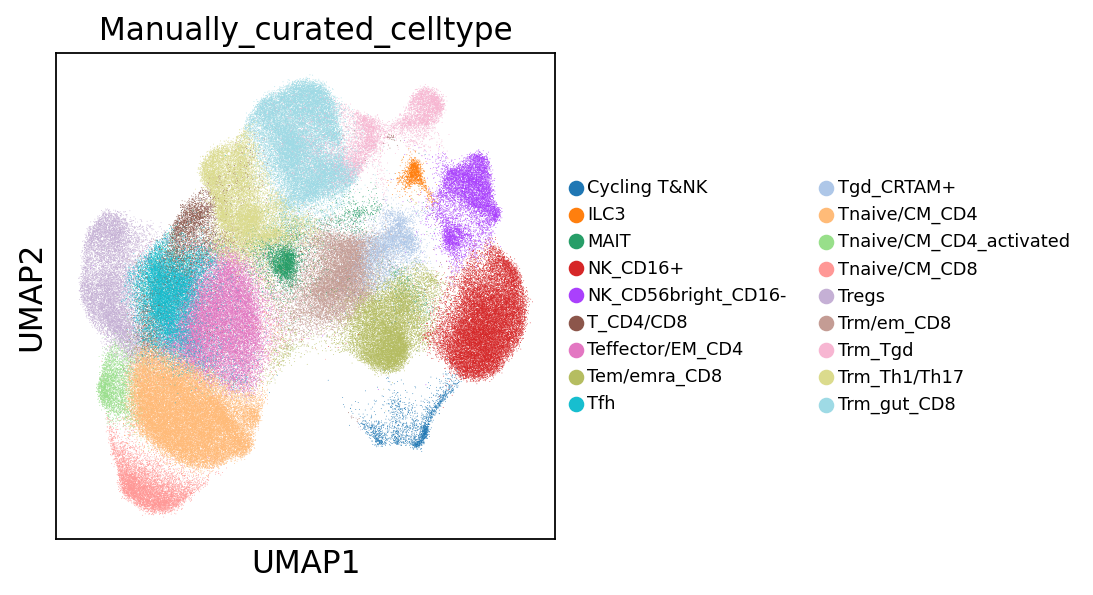

In [10]:
sc.pl.umap(adata, color="Manually_curated_celltype",#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

In [11]:
adata = adata[adata.obs['Manually_curated_celltype'].isin(['ILC3', 'MAIT', 'NK_CD16+', 'NK_CD56bright_CD16-',
                                                           'T_CD4/CD8', 'Teffector/EM_CD4', 'Tem/emra_CD8',
                                                           'Tfh', 'Tgd_CRTAM+','Tnaive/CM_CD4', 
                                                           'Tnaive/CM_CD4_activated', 'Tnaive/CM_CD8', 
                                                           'Tregs','Trm/em_CD8', 'Trm_Tgd', 'Trm_Th1/Th17',
                                                           'Trm_gut_CD8'])]

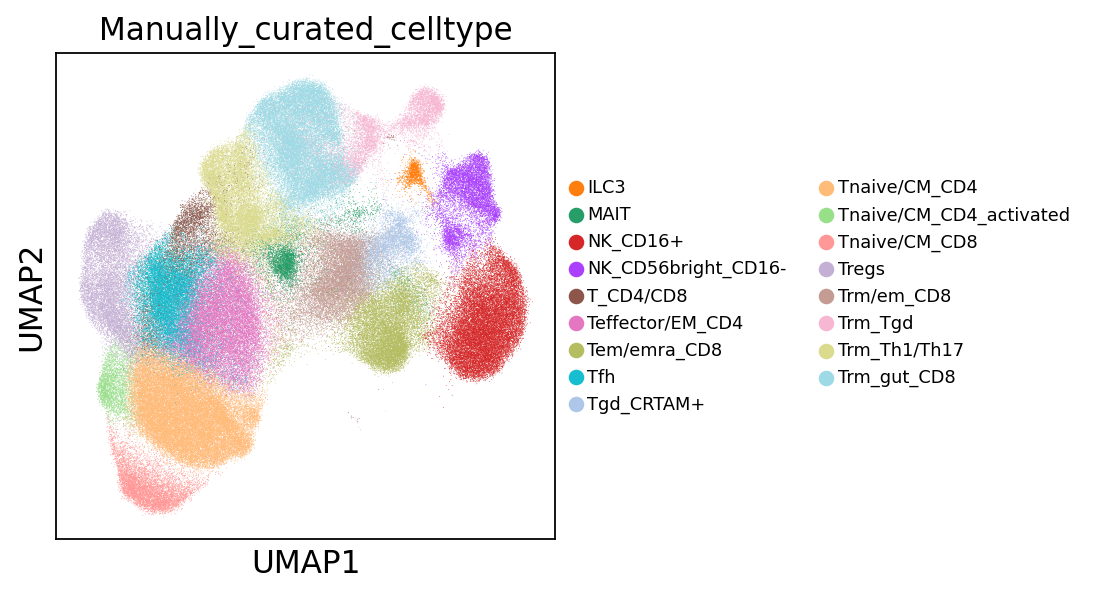

In [12]:
sc.pl.umap(adata, color="Manually_curated_celltype",#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

<AxesSubplot:title={'center':'adata'}>

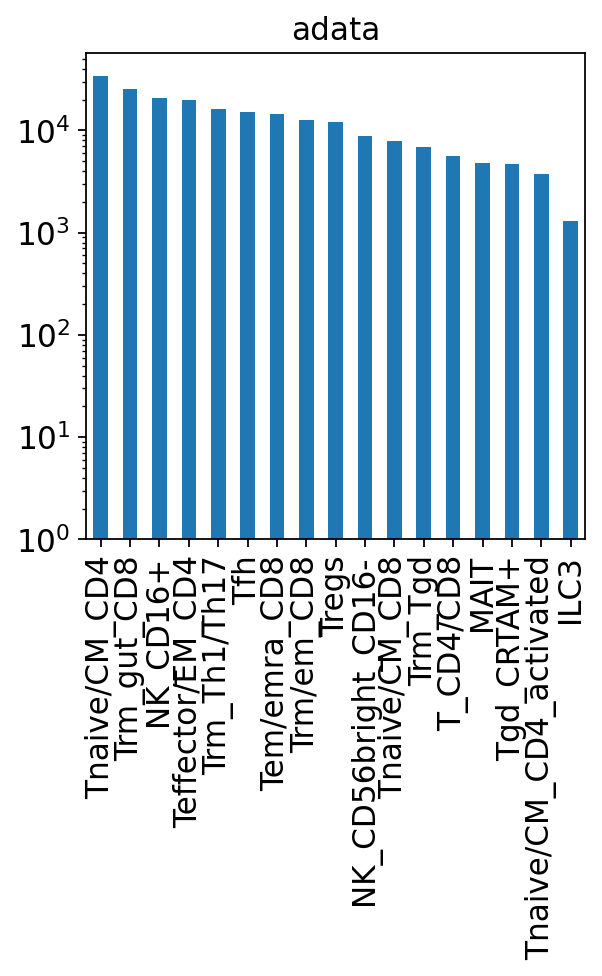

In [13]:
adata.obs['Manually_curated_celltype'].value_counts().plot(kind='bar', log="y",
                                                           grid=False, title='adata')

In [ ]:
# target_cells = 2000

# adatas = [adata[adata.obs['Manually_curated_celltype'].isin([clust])] for clust in adata.obs['Manually_curated_celltype'].cat.categories]

# for dat in adatas:
#     if dat.n_obs > target_cells:
#         sc.pp.subsample(dat, n_obs=target_cells, random_state=0)

# adata_sample1 = adatas[0].concatenate(*adatas[1:])

In [ ]:
# adata_sample1

In [ ]:
# adata_sample1.obs['Manually_curated_celltype'].value_counts().plot(kind='bar', #log="y",
#                                                                    grid=False, title='sampled cells')

In [ ]:
# adata = adata_sample1

In [ ]:
# sc.pl.umap(adata, color="Manually_curated_celltype",#save= "Lymphoid.png",
#            legend_fontoutline=1, legend_fontsize=8)

In [14]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=10e4)
sc.pp.log1p(adata)

/home/irepan/anaconda3/envs/pyscenic/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:524: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


In [15]:
#pip install --user scikit-misc
#sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor= "seurat_v3" )min_mean :
sc.settings.verbosity = 4
sc.pp.highly_variable_genes(adata, min_mean=0.3, max_mean=5)

extracting highly variable genes
    Gene indices [19943] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    finished (0:00:07)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


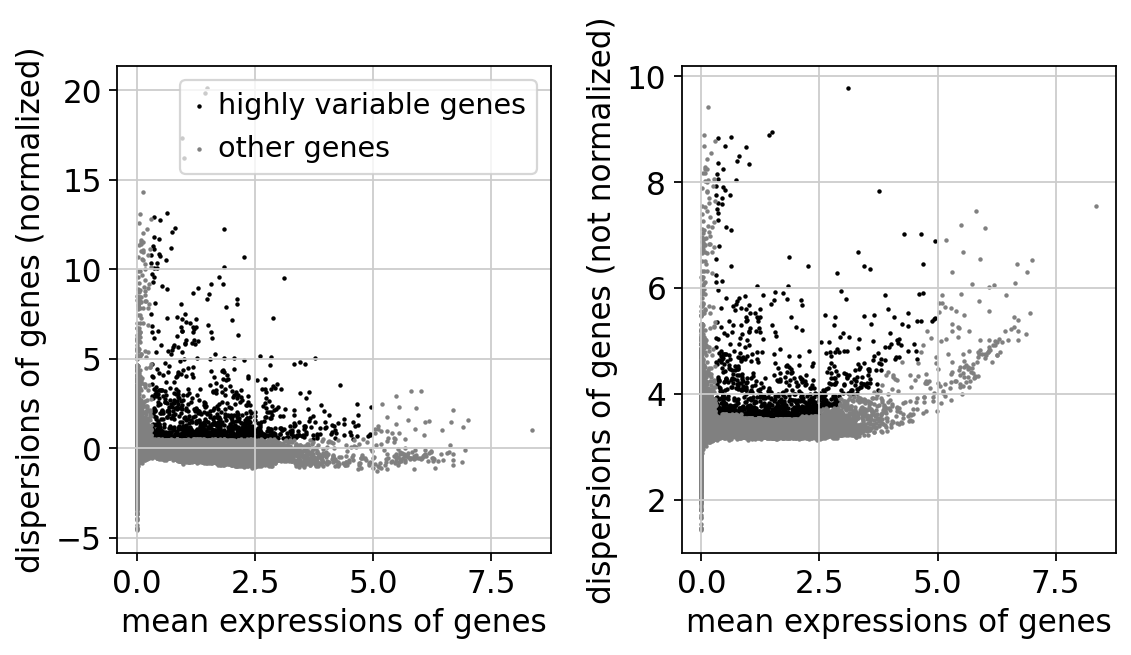

In [16]:
sc.pl.highly_variable_genes(adata)

normalizing counts per cell
    finished (0:00:11)


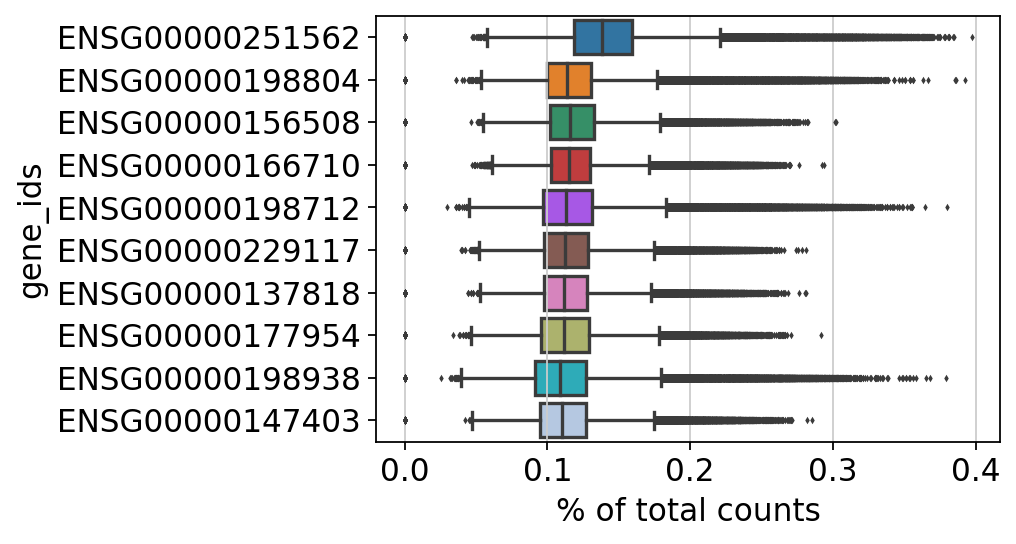

In [17]:
sc.pl.highest_expr_genes(adata, n_top=10, show=True)

ranking genes
    consider 'Manually_curated_celltype' groups:
    with sizes: [ 1312  4849 20591  8902  5631 19869 14612 15293  4690 33865  3748  7801
 12143 12674  6887 16099 25519]
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:10:40)


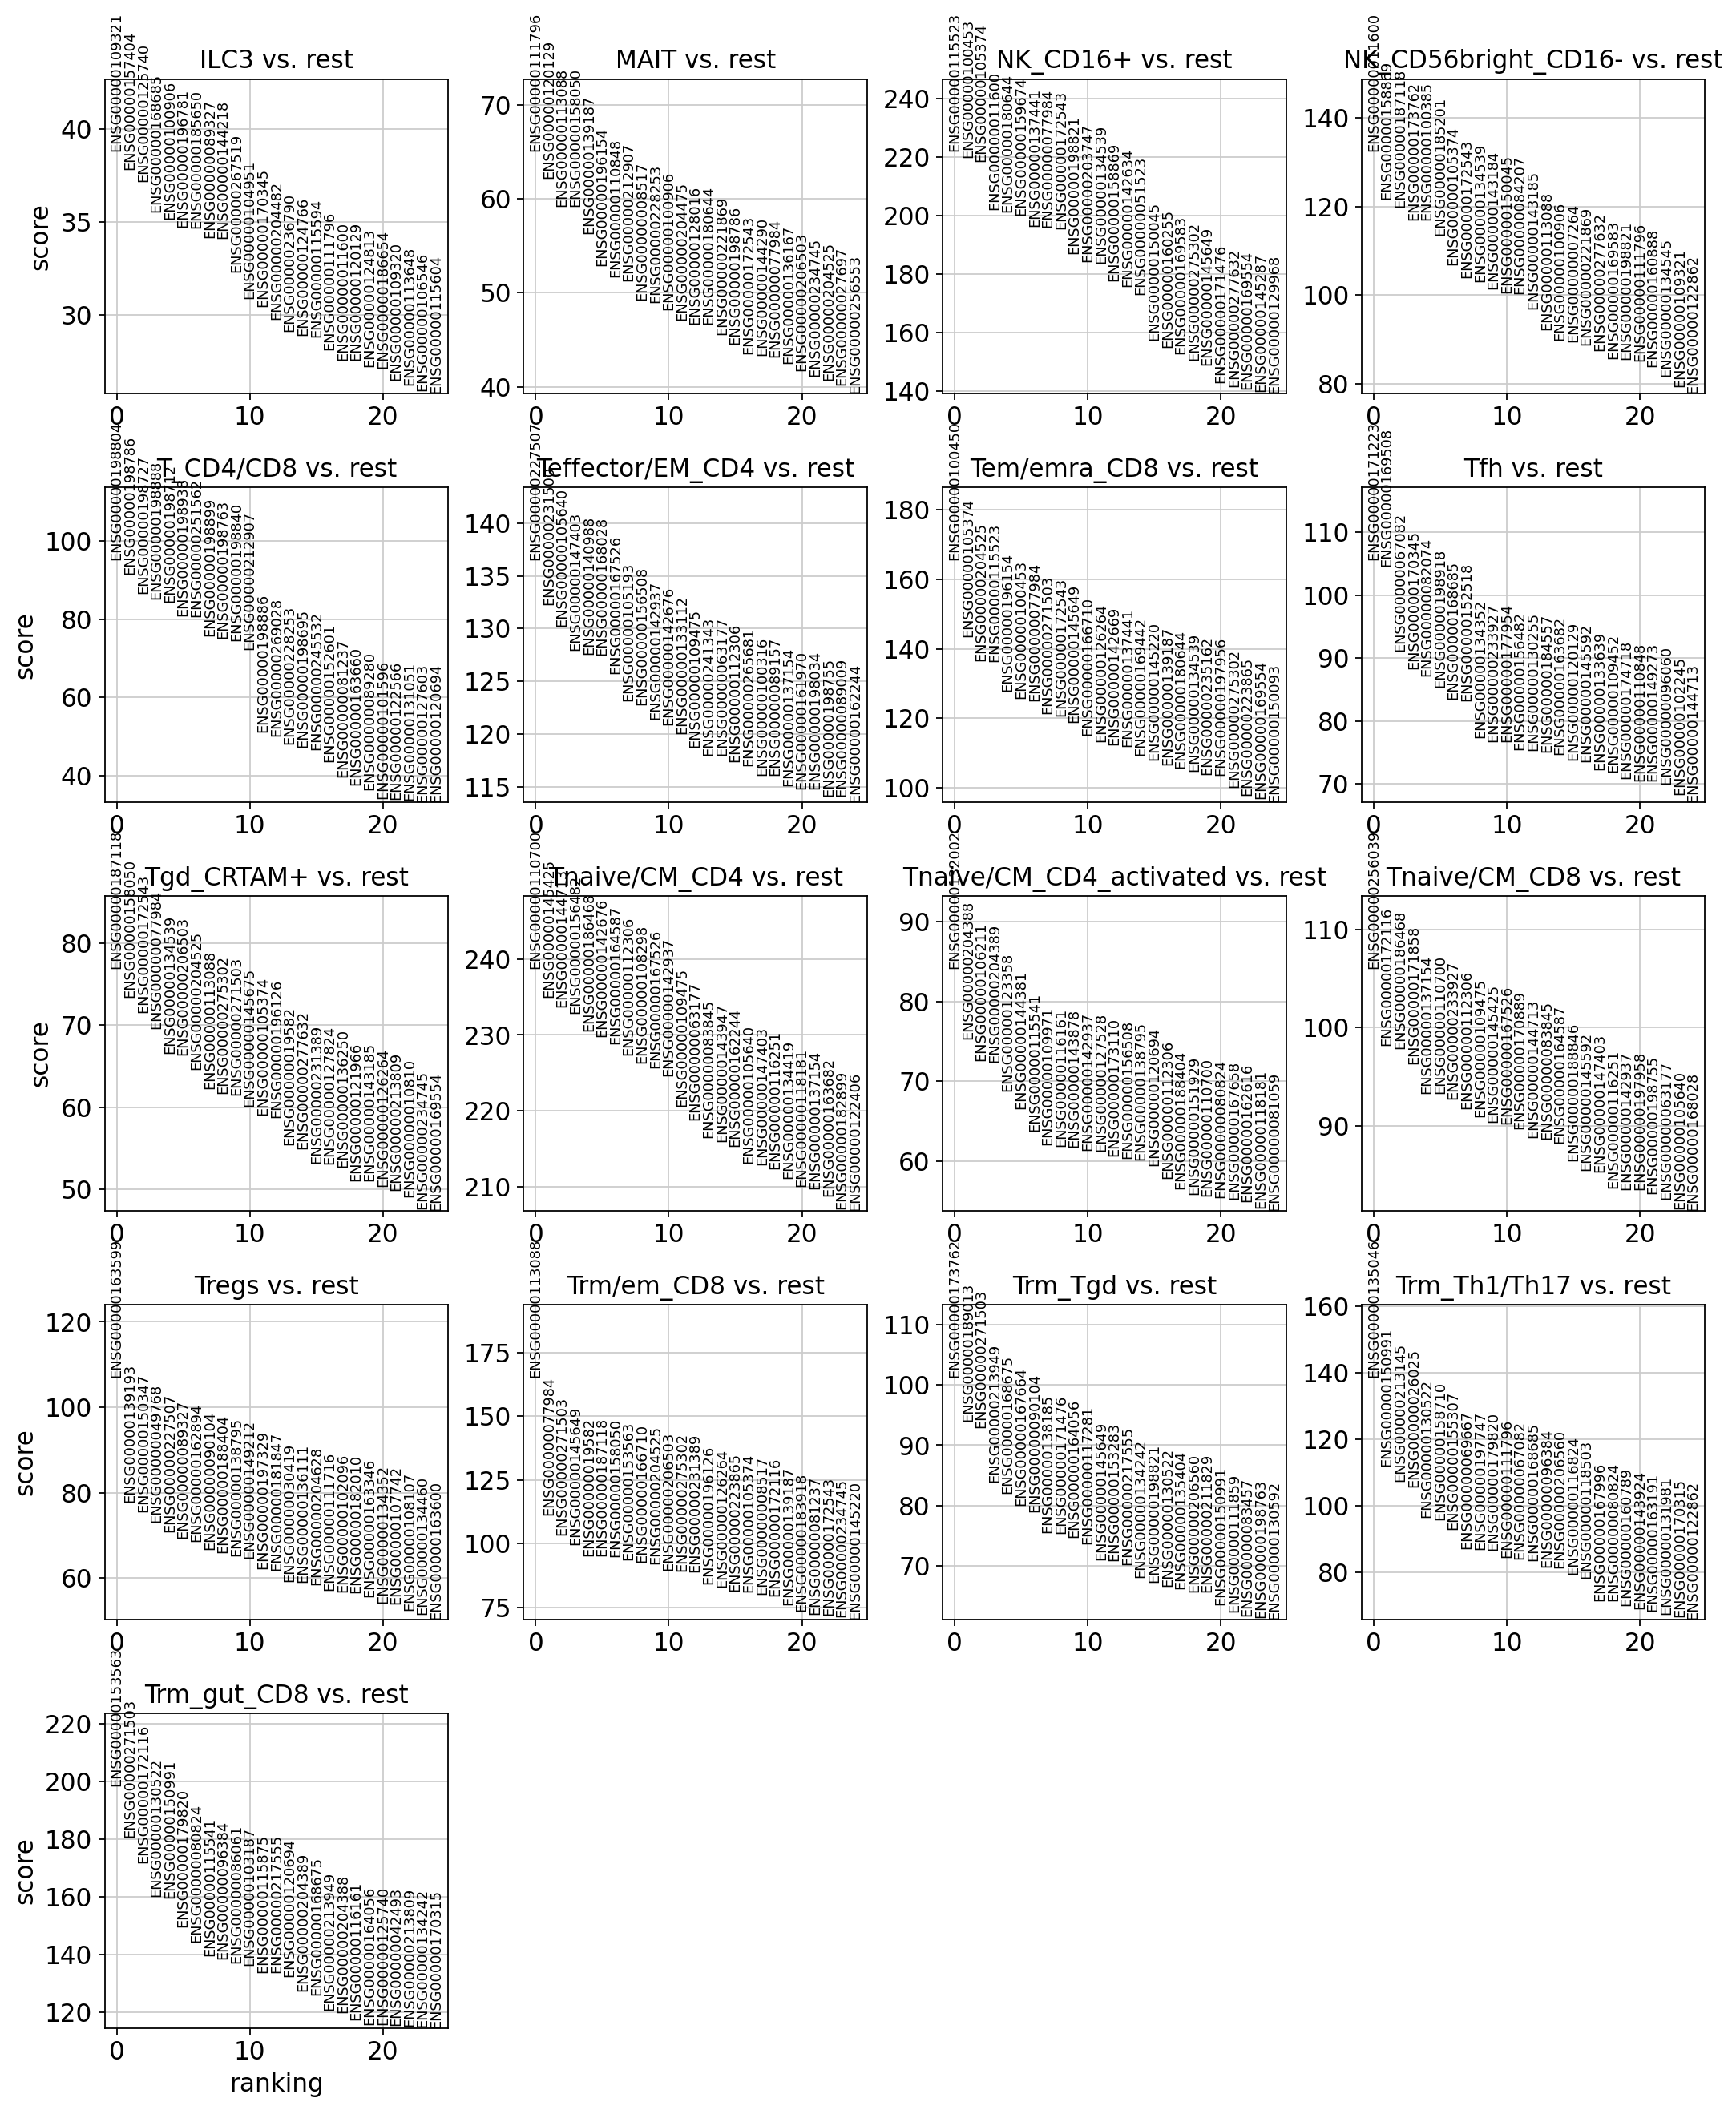

In [18]:
sc.tl.rank_genes_groups(adata, groupby= 'Manually_curated_celltype', method='wilcoxon', key_added= "wilcoxon")
sc.pl.rank_genes_groups(adata,  n_genes=25,  sharey=False, key= "wilcoxon")

In [19]:
adata.X.max()

10.872183

In [36]:
adata.write(tmpfile)

## Read prepocessed data

In [4]:
adata = sc.read_h5ad(tmpfile)

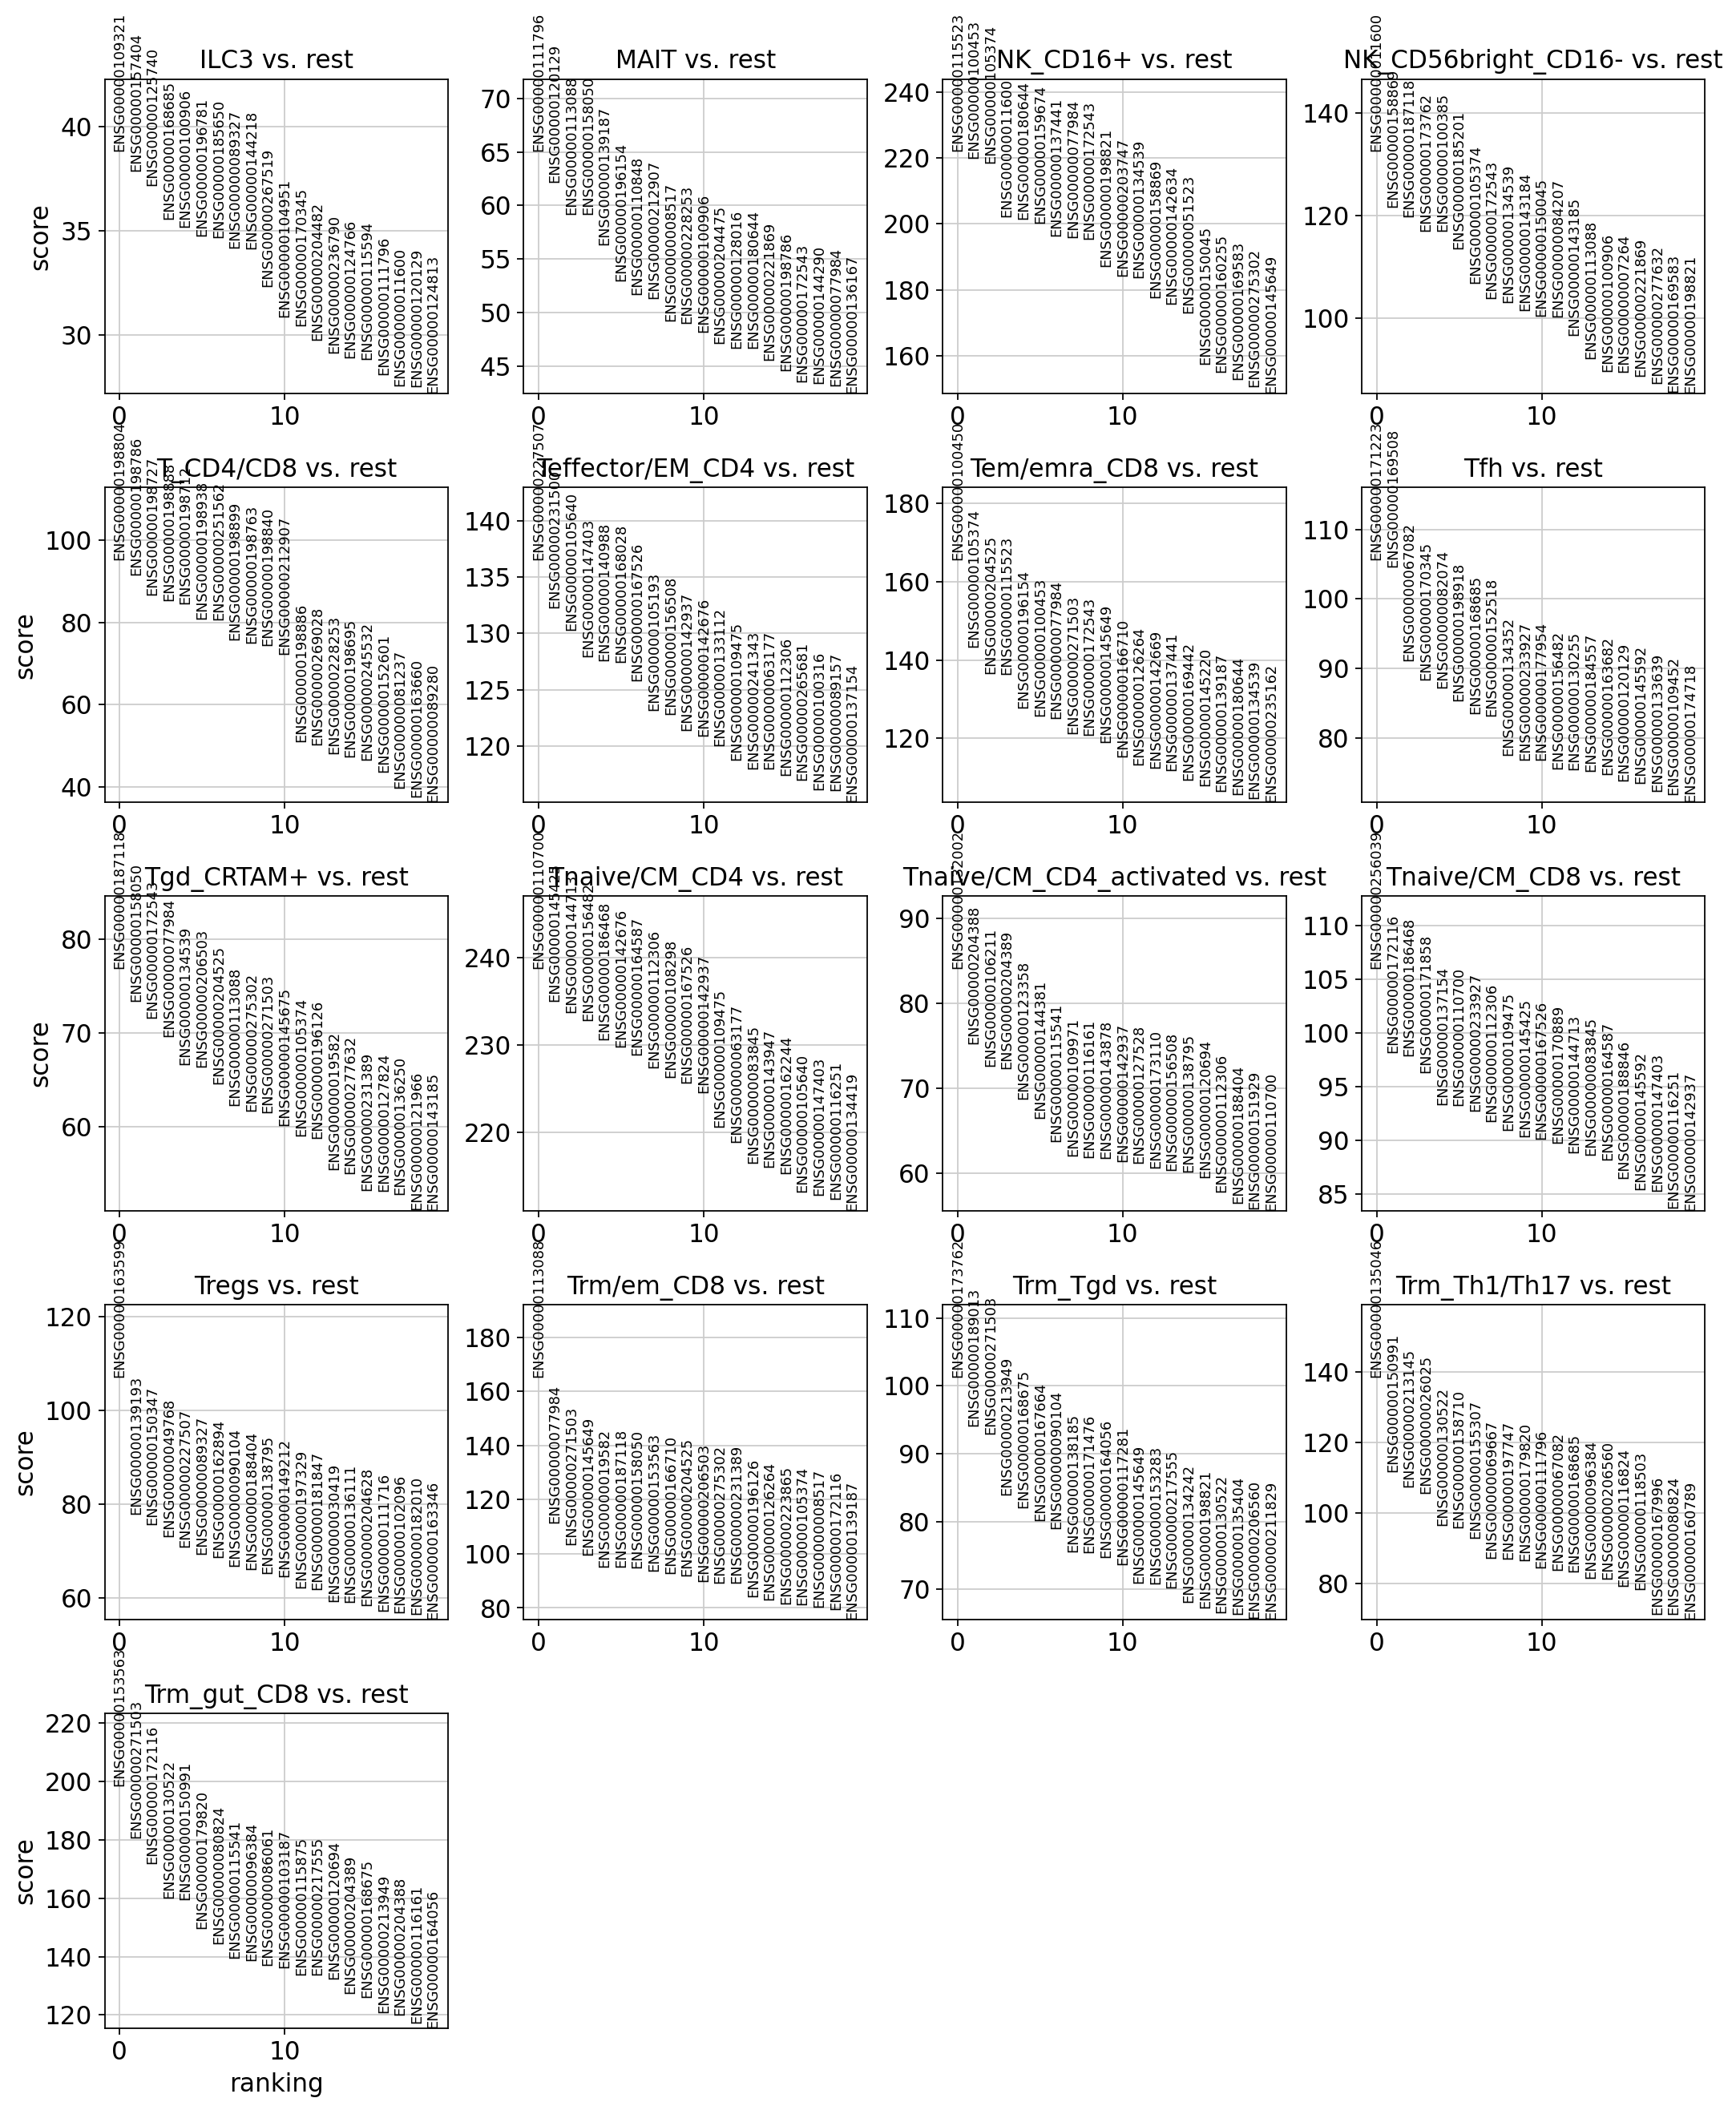

In [5]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, key = "wilcoxon")

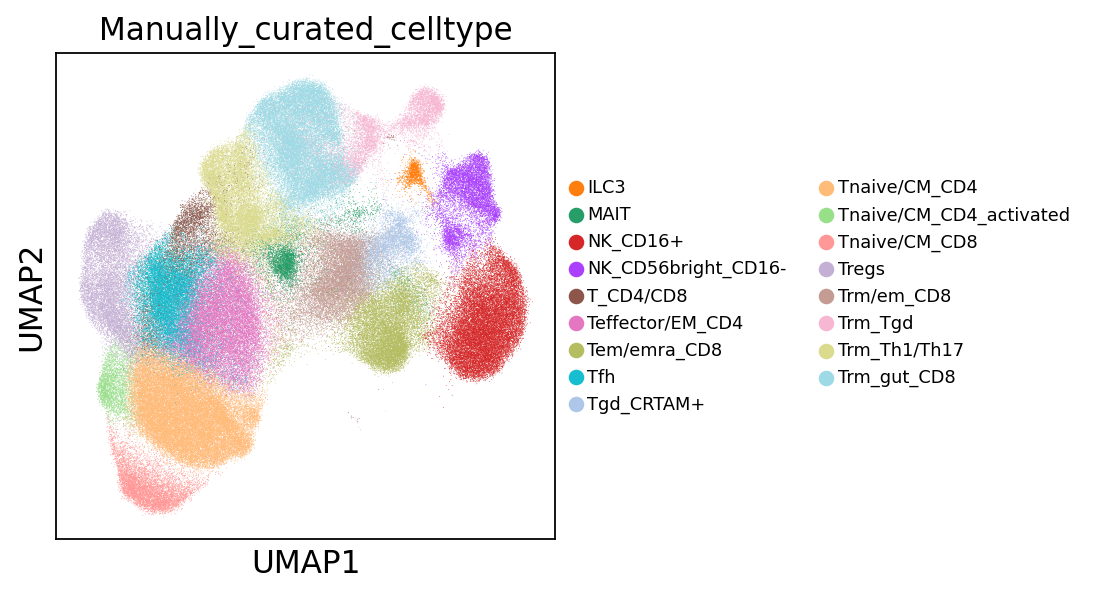

In [6]:
sc.pl.umap(adata, color="Manually_curated_celltype",#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

## Loop to produce the lists of Myeloid lineages

In [7]:
Subtypes = adata.obs['Manually_curated_celltype'].unique()
Subtypes

['Trm_Th1/Th17', 'Trm_gut_CD8', 'Trm_Tgd', 'T_CD4/CD8', 'Trm/em_CD8', ..., 'NK_CD16+', 'Tnaive/CM_CD8', 'MAIT', 'NK_CD56bright_CD16-', 'Tnaive/CM_CD4_activated']
Length: 17
Categories (17, object): ['ILC3', 'MAIT', 'NK_CD16+', 'NK_CD56bright_CD16-', ..., 'Trm/em_CD8', 'Trm_Tgd', 'Trm_Th1/Th17', 'Trm_gut_CD8']

In [8]:
for i in range(0,len(Subtypes)):
    print(i, Subtypes[i])

0 Trm_Th1/Th17
1 Trm_gut_CD8
2 Trm_Tgd
3 T_CD4/CD8
4 Trm/em_CD8
5 Tregs
6 Teffector/EM_CD4
7 Tem/emra_CD8
8 Tfh
9 ILC3
10 Tnaive/CM_CD4
11 Tgd_CRTAM+
12 NK_CD16+
13 Tnaive/CM_CD8
14 MAIT
15 NK_CD56bright_CD16-
16 Tnaive/CM_CD4_activated


### Marker genes for each Subtype

In [9]:
Markers = [[]]*len(Subtypes)

for i in range(0,len(Subtypes)):
    print(i, Subtypes[i])
    m = sc.get.rank_genes_groups_df(adata, group=Subtypes[i],
                                    key='wilcoxon', pval_cutoff=0.0001,
                                    log2fc_min=1)
    m = m.sort_values("logfoldchanges", ascending=False)
    m.reset_index(drop=True, inplace=True)
    Markers[i] = m

0 Trm_Th1/Th17
1 Trm_gut_CD8
2 Trm_Tgd
3 T_CD4/CD8
4 Trm/em_CD8
5 Tregs
6 Teffector/EM_CD4
7 Tem/emra_CD8
8 Tfh
9 ILC3
10 Tnaive/CM_CD4
11 Tgd_CRTAM+
12 NK_CD16+
13 Tnaive/CM_CD8
14 MAIT
15 NK_CD56bright_CD16-
16 Tnaive/CM_CD4_activated


In [10]:
Markers[8]["names"][0:4]

0    ENSG00000182585
1    ENSG00000114948
2    ENSG00000177469
3    ENSG00000160683
Name: names, dtype: object

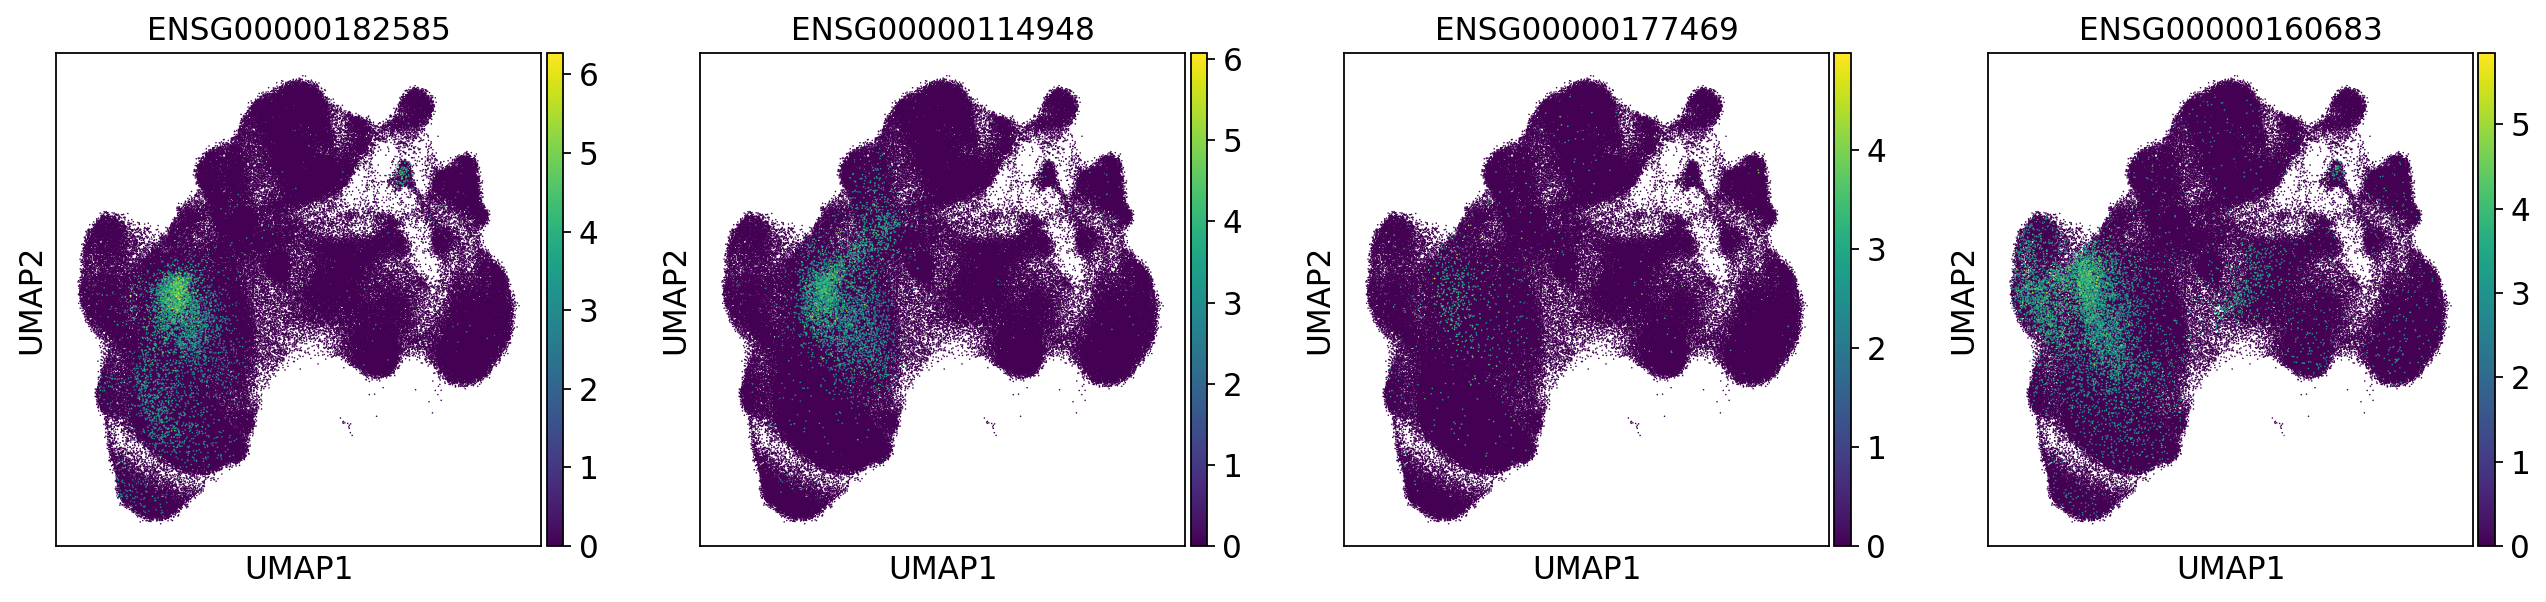

In [11]:
sc.pl.umap(adata, color= Markers[8]["names"][0:4], size=2 ) # top

### Get names of 300 top markers (if possible) for each Subtype

In [12]:
#pip install upsetplot
from upsetplot import from_contents
from upsetplot import UpSet

In [24]:
Sets = [[]]*len(Subtypes)
CompleteSets = [[]]*len(Subtypes)

for i in range(0,len(Subtypes)):
    CompleteSets[i] = Markers[i]['names']
    n = len(Markers[i])
    print(i, Subtypes[i], n)
    if n > 300 :
        print("yes")
        Sets[i] = Markers[i].loc[0:299,'names']
    else :
        print("no")
        Sets[i] = Markers[i].loc[0:n-1,'names']

0 Trm_Th1/Th17 306
yes
1 Trm_gut_CD8 590
yes
2 Trm_Tgd 1010
yes
3 T_CD4/CD8 58
no
4 Trm/em_CD8 184
no
5 Tregs 343
yes
6 Teffector/EM_CD4 287
no
7 Tem/emra_CD8 435
yes
8 Tfh 213
no
9 ILC3 668
yes
10 Tnaive/CM_CD4 423
yes
11 Tgd_CRTAM+ 447
yes
12 NK_CD16+ 982
yes
13 Tnaive/CM_CD8 301
yes
14 MAIT 265
no
15 NK_CD56bright_CD16- 859
yes
16 Tnaive/CM_CD4_activated 504
yes


In [14]:
Dict_markers =  {}
CompleteDict_markers =  {}

for i in range(0,len(Subtypes)):
    Dict_markers[Subtypes[i]] = Sets[i]
    CompleteDict_markers[Subtypes[i]] = CompleteSets[i]

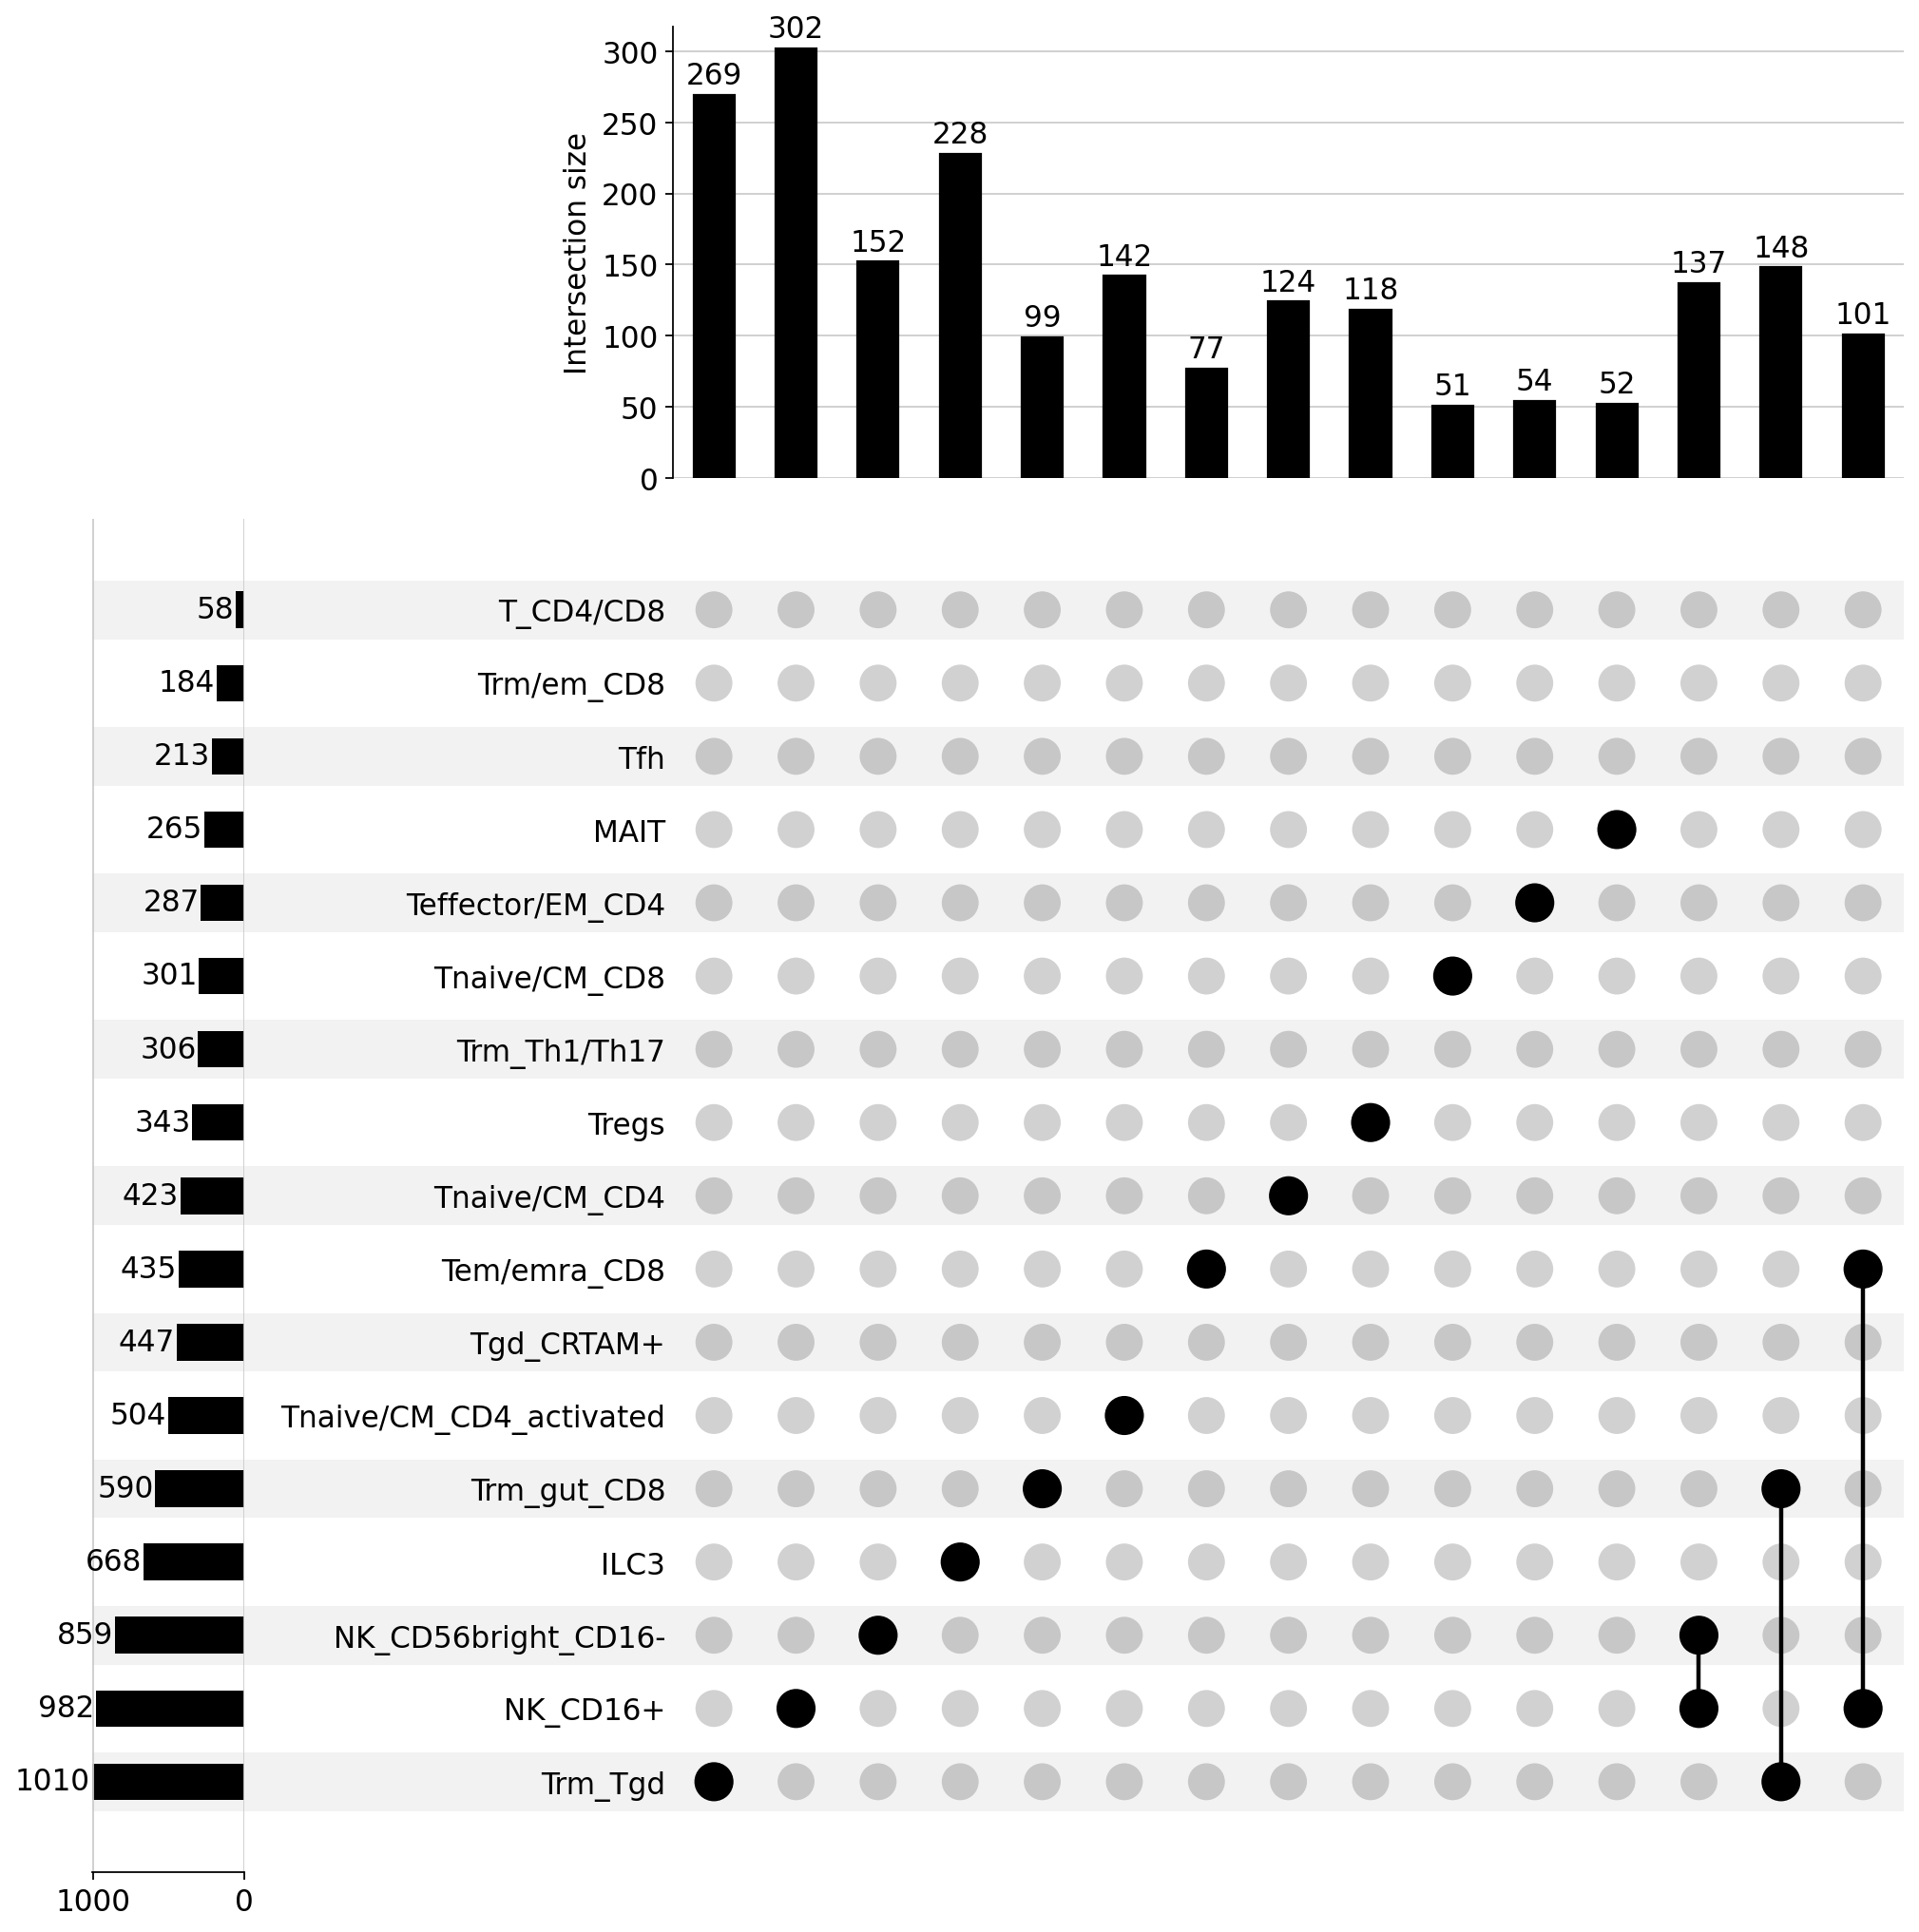

In [15]:
CT_markers = from_contents(CompleteDict_markers)

plt = UpSet(CT_markers, min_subset_size=50, subset_size='count',element_size=50,  show_counts=True).plot()

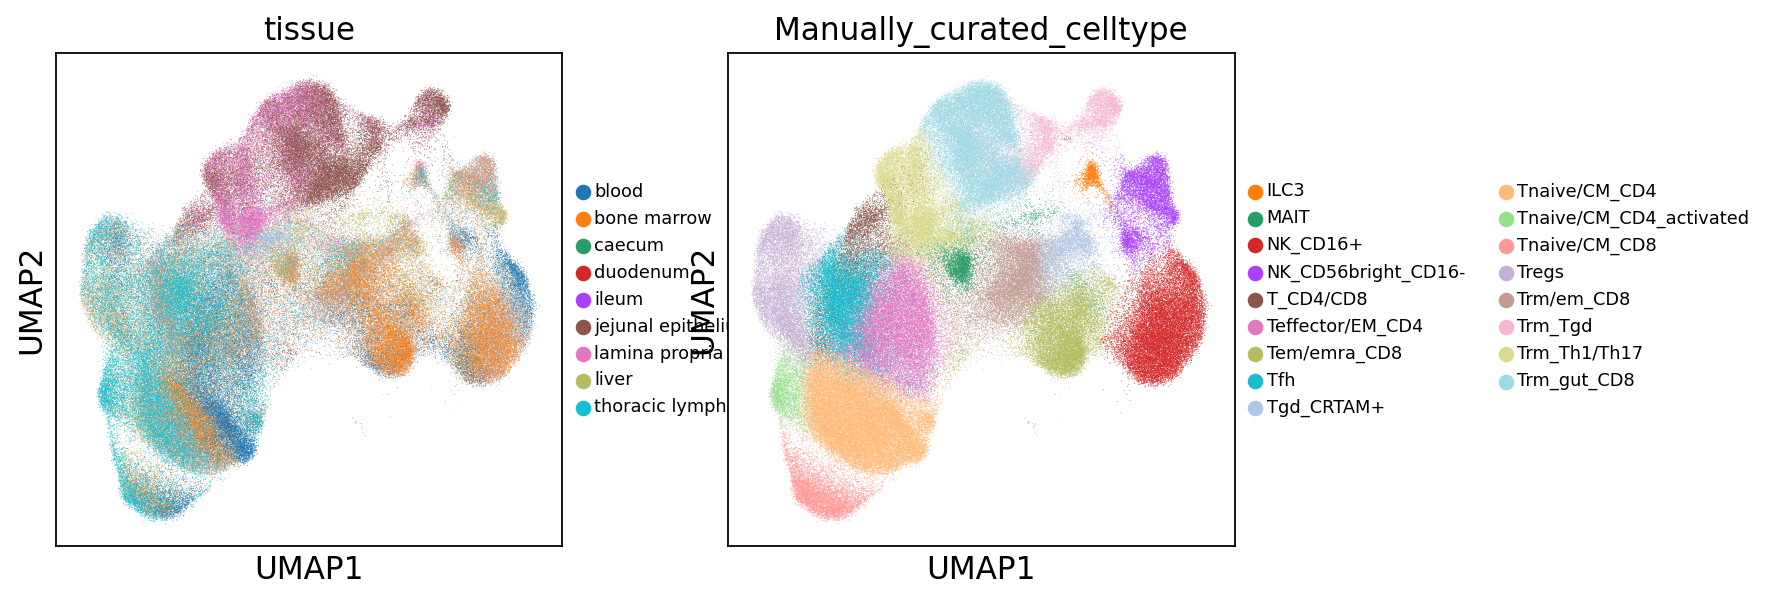

In [16]:
sc.pl.umap(adata, color=["tissue",'Manually_curated_celltype'] ,#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

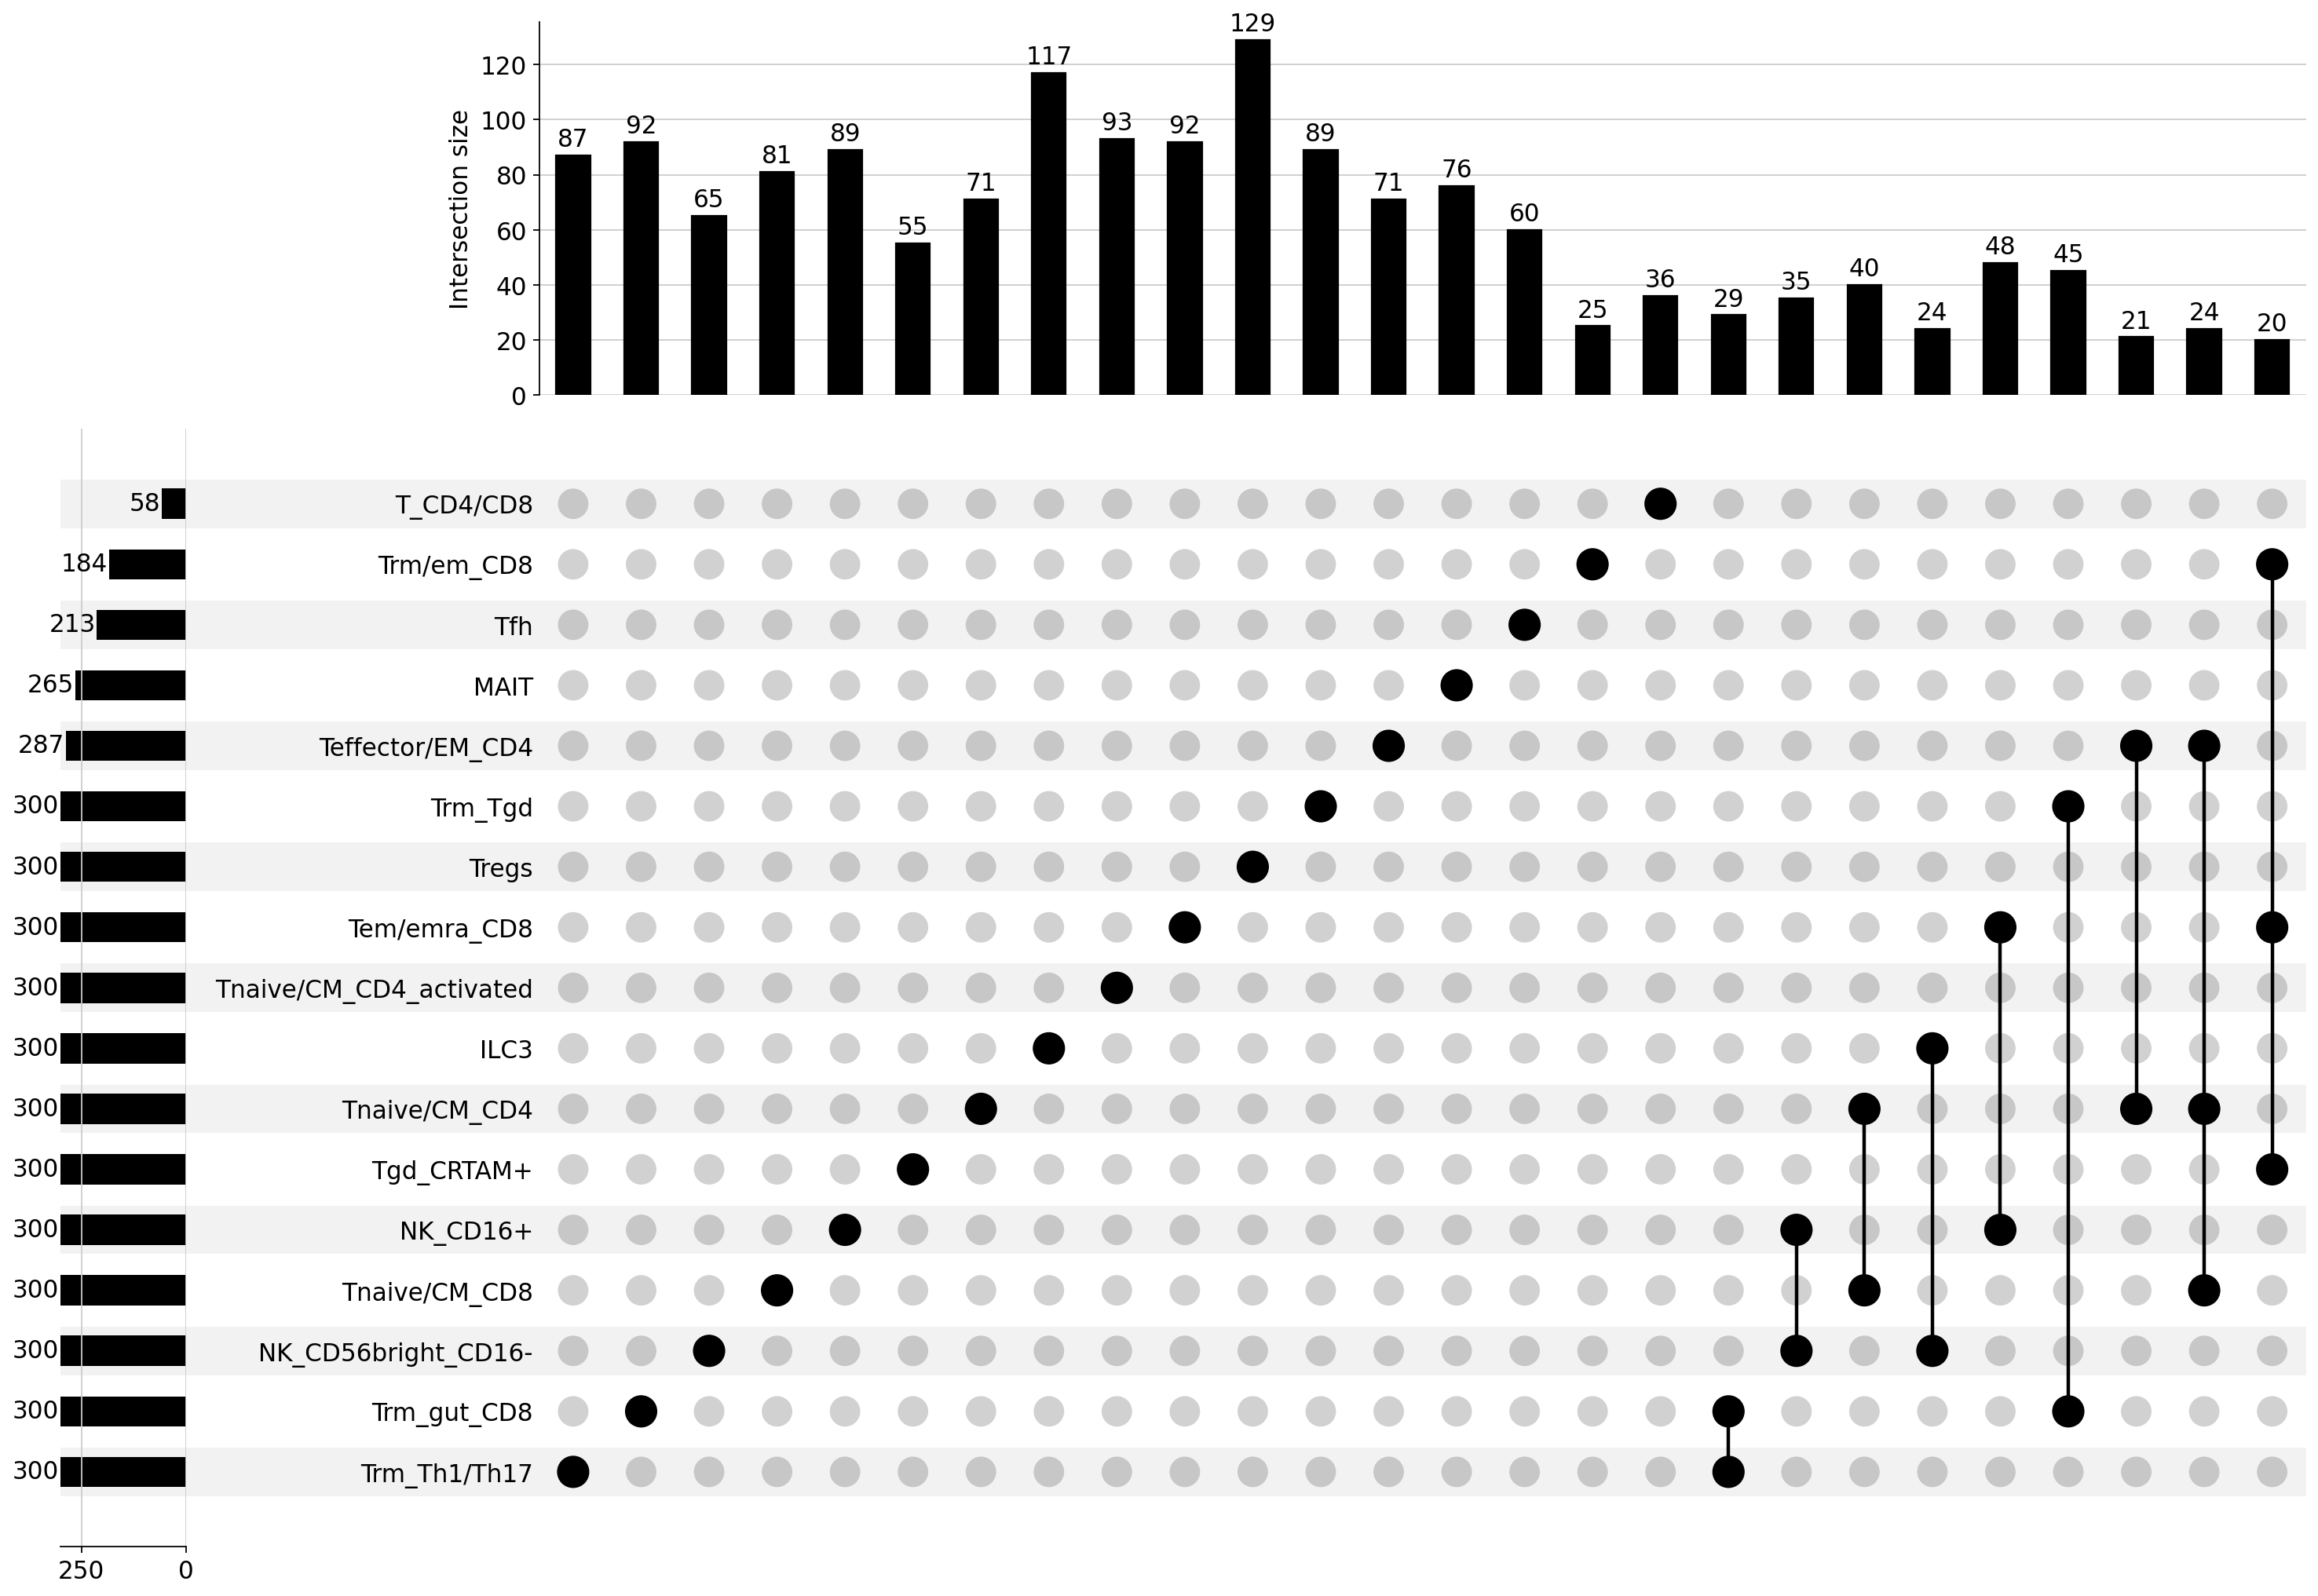

In [17]:
CT_markers = from_contents(Dict_markers)

plt = UpSet(CT_markers, min_subset_size=20, subset_size='count',element_size=50,  show_counts=True).plot()

In [18]:
Dict_markers['Tregs'].loc[0:9]

0    ENSG00000183395
1    ENSG00000049768
2    ENSG00000137507
3    ENSG00000203780
4    ENSG00000124721
5    ENSG00000171435
6    ENSG00000105352
7    ENSG00000163599
8    ENSG00000235304
9    ENSG00000182010
Name: names, dtype: object

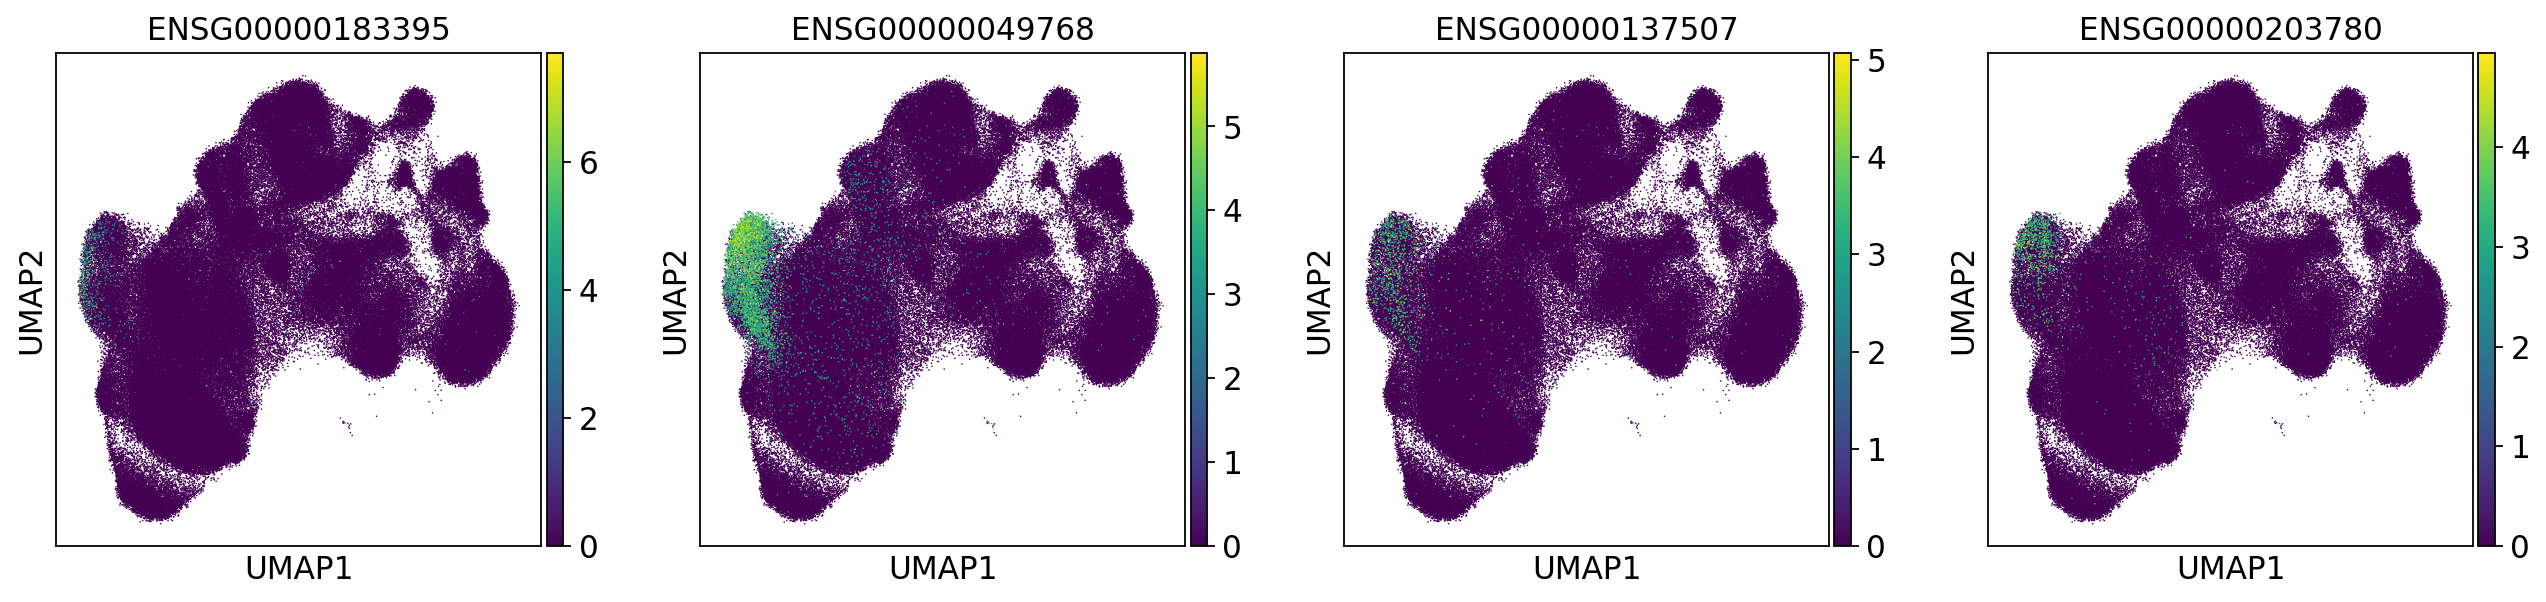

In [20]:
sc.pl.umap(adata, color=Dict_markers['Tregs'].loc[0:3], size=2) # top

In [25]:
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(Sets[0], Sets[1], Sets[2],
                           Sets[5], Sets[7], Sets[9],
                           Sets[10],Sets[11],Sets[12],
                           Sets[13],Sets[15],Sets[16],
                          
                          )),
                  columns =[Subtypes[0], Subtypes[1], Subtypes[2],
                            Subtypes[5], Subtypes[7], Subtypes[9],
                            Subtypes[10],Subtypes[11],Subtypes[12],
                            Subtypes[13],Subtypes[15],Subtypes[16]
                           ])

Trm_em_CD8_df = pd.DataFrame(list(zip(Sets[4])),columns =[Subtypes[4]])
Trm_em_CD8_df.columns = ['Trm_em_CD8']

Teffector_EM_CD4_df = pd.DataFrame(list(zip(Sets[6])),columns =[Subtypes[6]])
Teffector_EM_CD4_df.columns = ['Teffector_EM_CD4']

Tfh_df = pd.DataFrame(list(zip(Sets[8])),columns =[Subtypes[8]])
Tfh_df.columns = ['Tfh']

MAIT_df = pd.DataFrame(list(zip(Sets[14])),columns =[Subtypes[14]])
MAIT_df.columns = ['MAIT']



In [26]:
df

Trm_Th1/Th17      Trm_gut_CD8          Trm_Tgd            Tregs  \
0    ENSG00000112115  ENSG00000153563  ENSG00000163518  ENSG00000183395   
1    ENSG00000115009  ENSG00000271503  ENSG00000096264  ENSG00000049768   
2    ENSG00000127318  ENSG00000172116  ENSG00000079112  ENSG00000137507   
3    ENSG00000104951  ENSG00000171659  ENSG00000050767  ENSG00000203780   
4    ENSG00000135046  ENSG00000159307  ENSG00000205426  ENSG00000124721   
..               ...              ...              ...              ...   
295  ENSG00000162676  ENSG00000115875  ENSG00000163659  ENSG00000153551   
296  ENSG00000152127  ENSG00000133739  ENSG00000136872  ENSG00000178573   
297  ENSG00000095397  ENSG00000120438  ENSG00000153094  ENSG00000114861   
298  ENSG00000149257  ENSG00000127946  ENSG00000095397  ENSG00000167257   
299  ENSG00000105281  ENSG00000139629  ENSG00000143167  ENSG00000168421   

        Tem/emra_CD8             ILC3    Tnaive/CM_CD4       Tgd_CRTAM+  \
0    ENSG00000115523  ENSG00000108018  ENSG00000182463  ENSG00000156886   
1    ENSG00000198033  ENSG00000101333  ENSG00000165617  ENSG00000211804   
2    ENSG00000100450  ENSG00000105251  ENSG00000126353  ENSG00000162692   
3    ENSG00000276241  ENSG00000157404  ENSG00000189283  ENSG00000256590   
4    ENSG00000105374  ENSG00000111452  ENSG00000188404  ENSG00000187118   
..               ...              ...              ...              ...   
295  ENSG00000089692  ENSG00000117139  ENSG00000176928  ENSG00000103365   
296  ENSG00000166503  ENSG00000178719  ENSG00000196329  ENSG00000085832   
297  ENSG00000068028  ENSG00000151287  ENSG00000173726  ENSG00000212907   
298  ENSG00000105963  ENSG00000261064  ENSG00000188868  ENSG00000107331   
299  ENSG00000198502  ENSG00000135541  ENSG00000063177  ENSG00000244734   

            NK_CD16+    Tnaive/CM_CD8 NK_CD56bright_CD16-  \
0    ENSG00000115523  ENSG00000256039     ENSG00000011600   
1    ENSG00000100453  ENSG00000134193     ENSG00000158869   
2    ENSG00000197467  ENSG00000227945     ENSG00000196542   
3    ENSG00000137441  ENSG00000234456     ENSG00000130768   
4    ENSG00000163453  ENSG00000283361     ENSG00000182885   
..               ...              ...                 ...   
295  ENSG00000152217  ENSG00000136938     ENSG00000128604   
296  ENSG00000110906  ENSG00000167286     ENSG00000164483   
297  ENSG00000157657  ENSG00000137154     ENSG00000132965   
298  ENSG00000135404  ENSG00000109929     ENSG00000198719   
299  ENSG00000155629  ENSG00000072310     ENSG00000106069   

    Tnaive/CM_CD4_activated  
0           ENSG00000204389  
1           ENSG00000204388  
2           ENSG00000173110  
3           ENSG00000165507  
4           ENSG00000204241  
..                      ...  
295         ENSG00000188191  
296         ENSG00000184602  
297         ENSG00000131634  
298         ENSG00000173198  
299         ENSG00000196352  

[300 rows x 12 columns]

In [27]:
MAIT_df

MAIT
0    ENSG00000244067
1    ENSG00000144290
2    ENSG00000196616
3    ENSG00000211713
4    ENSG00000118271
..               ...
260  ENSG00000244734
261  ENSG00000185650
262  ENSG00000163902
263  ENSG00000182718
264  ENSG00000151414

[265 rows x 1 columns]

In [28]:
# pip install rpy2
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

In [29]:
%%R -i df -w 5 -h 5 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution
# library("EnsDb.Hsapiens.v86")

head(df)

     Trm_Th1/Th17     Trm_gut_CD8         Trm_Tgd           Tregs
0 ENSG00000112115 ENSG00000153563 ENSG00000163518 ENSG00000183395
1 ENSG00000115009 ENSG00000271503 ENSG00000096264 ENSG00000049768
2 ENSG00000127318 ENSG00000172116 ENSG00000079112 ENSG00000137507
3 ENSG00000104951 ENSG00000171659 ENSG00000050767 ENSG00000203780
4 ENSG00000135046 ENSG00000159307 ENSG00000205426 ENSG00000124721
5 ENSG00000133401 ENSG00000157470 ENSG00000214491 ENSG00000171435
     Tem/emra_CD8            ILC3   Tnaive/CM_CD4      Tgd_CRTAM+
0 ENSG00000115523 ENSG00000108018 ENSG00000182463 ENSG00000156886
1 ENSG00000198033 ENSG00000101333 ENSG00000165617 ENSG00000211804
2 ENSG00000100450 ENSG00000105251 ENSG00000126353 ENSG00000162692
3 ENSG00000276241 ENSG00000157404 ENSG00000189283 ENSG00000256590
4 ENSG00000105374 ENSG00000111452 ENSG00000188404 ENSG00000187118
5 ENSG00000163421 ENSG00000184226 ENSG00000138795 ENSG00000113088
         NK_CD16+   Tnaive/CM_CD8 NK_CD56bright_CD16- Tnaive/CM_CD4_activate

In [34]:
%%R

library(stringr)
dim(df)
genelists <- colnames(df)
path <- "~/Desktop/Github/Immune_Adaptation_Atlas/adult_tissues/ENS_genelists_wilcox/Tcells/"

for (i in genelists)
    {
    goi <- df[,i]
#    #print(i)
    f <- str_replace_all(i, "/", "_")
    print(f)
#    ens_df <- ensembldb::select(EnsDb.Hsapiens.v86, keys= goi, 
#                              keytype = "SYMBOL", 
#                              columns = c("SYMBOL","GENEID"))
#   
#    ens_df <- ens_df$GENEID[grepl(pattern = "^ENS", x = ens_df$GENEID)]
#    #print(head(ens_df)) 
#
#    write(x = ens_df, file = paste0(path, f ,"_ENSEMBL.txt"),ncolumns = 1)
    write(x = goi, file = paste0(path, f ,"_ENSEMBL.txt"),ncolumns = 1)
    }

[1] "Trm_Th1_Th17"
[1] "Trm_gut_CD8"
[1] "Trm_Tgd"
[1] "Tregs"
[1] "Tem_emra_CD8"
[1] "ILC3"
[1] "Tnaive_CM_CD4"
[1] "Tgd_CRTAM+"
[1] "NK_CD16+"
[1] "Tnaive_CM_CD8"
[1] "NK_CD56bright_CD16-"
[1] "Tnaive_CM_CD4_activated"


In [35]:
%%R -i Trm_em_CD8_df
# import df from global environment
head(Trm_em_CD8_df)

goi <- Trm_em_CD8_df[,1]
f <- colnames(Trm_em_CD8_df)
print(f)
write(x = goi, file = paste0(path, f,"_ENSEMBL.txt"),ncolumns = 1)

[1] "Trm_em_CD8"


In [36]:
%%R -i Teffector_EM_CD4_df
# import df from global environment
head(Teffector_EM_CD4_df)

goi <- Teffector_EM_CD4_df[,1]
f <- colnames(Teffector_EM_CD4_df)
print(f)
write(x = goi, file = paste0(path, f,"_ENSEMBL.txt"),ncolumns = 1)

[1] "Teffector_EM_CD4"


In [37]:
%%R -i Tfh_df
# import df from global environment
head(Tfh_df)

goi <- Tfh_df[,1]
f <- colnames(Tfh_df)
print(f)
write(x = goi, file = paste0(path, f,"_ENSEMBL.txt"),ncolumns = 1)

[1] "Tfh"


In [38]:
%%R -i MAIT_df
# import df from global environment
head(MAIT_df)

goi <- MAIT_df[,1]
f <- colnames(MAIT_df)
print(f)
write(x = goi, file = paste0(path, f,"_ENSEMBL.txt"),ncolumns = 1)

[1] "MAIT"


## Export full list of marker genes

In [39]:
full_csv_path = '/home/irepan/Desktop/Github/Immune_Adaptation_Atlas/adult_tissues/ENS_FULL_genelists_wilcox/Tcells/full.csv'

(pd.DataFrame.from_dict(data=CompleteDict_markers, orient='index')
   .to_csv(full_csv_path, header=False))

In [41]:
%%R -i full_csv_path
library("EnsDb.Hsapiens.v86")
library(stringr)

path <- "~/Desktop/Github/Immune_Adaptation_Atlas/adult_tissues/ENS_FULL_genelists_wilcox/Tcells/"

mycsv <- read.csv(full_csv_path, row.names = 1,header = F, na.strings = "")

for (i in 1:nrow(mycsv))
{
    genelist <- row.names(mycsv)[i]
    n <- sum(!is.na(mycsv[i,]))
    #print(paste0(n," genes"))
    
    goi <- as.character(mycsv[i,1:n])
    print(goi[1:5])

    f <- str_replace_all(genelist, "/", "_")
    print(f)
#    ens_df <- ensembldb::select(EnsDb.Hsapiens.v86, keys= goi, 
#                              keytype = "SYMBOL", 
#                              columns = c("SYMBOL","GENEID"))
#   
#    ens_df <- ens_df$GENEID[grepl(pattern = "^ENS", x = ens_df$GENEID)]
#    #print(head(ens_df)) 
#
#    write(x = ens_df, file = paste0(path, f ,"_FULL_ENSEMBL.txt"),ncolumns = 1)
    write(x = goi, file = paste0(path, f ,"_FULL_ENSEMBL.txt"),ncolumns = 1)

}


[1] "ENSG00000112115" "ENSG00000115009" "ENSG00000127318" "ENSG00000104951"
[5] "ENSG00000135046"
[1] "Trm_Th1_Th17"
[1] "ENSG00000153563" "ENSG00000271503" "ENSG00000172116" "ENSG00000171659"
[5] "ENSG00000159307"
[1] "Trm_gut_CD8"
[1] "ENSG00000163518" "ENSG00000096264" "ENSG00000079112" "ENSG00000050767"
[5] "ENSG00000205426"
[1] "Trm_Tgd"
[1] "ENSG00000269028" "ENSG00000212907" "ENSG00000228253" "ENSG00000198695"
[5] "ENSG00000163359"
[1] "T_CD4_CD8"
[1] "ENSG00000113088" "ENSG00000271503" "ENSG00000162692" "ENSG00000145649"
[5] "ENSG00000077984"
[1] "Trm_em_CD8"
[1] "ENSG00000183395" "ENSG00000049768" "ENSG00000137507" "ENSG00000203780"
[5] "ENSG00000124721"
[1] "Tregs"
[1] "ENSG00000167768" "ENSG00000277586" "ENSG00000233387" "ENSG00000227507"
[5] "ENSG00000070526"
[1] "Teffector_EM_CD4"
[1] "ENSG00000115523" "ENSG00000198033" "ENSG00000100450" "ENSG00000276241"
[5] "ENSG00000105374"
[1] "Tem_emra_CD8"
[1] "ENSG00000182585" "ENSG00000114948" "ENSG00000177469" "ENSG00000160683"
[5